# TASK1 -    FAKE NEWS DETECTION

<img src="news1.jpg">

# <div class="alert alert-success">Importing Libraries And Dataset</div>

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
data_path= 'news.csv'

n_words = 200


In [3]:
def trim_string(x):

    x = str(x).split(maxsplit=n_words)
    x = ' '.join(x[:n_words])

    return x

In [4]:
data = pd.read_csv(data_path)


C:\Users\WiseMan\AppData\Local\Temp\ipykernel_9020\1675668717.py:1: DtypeWarning: Columns (24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


# <div class="alert alert-info">Exploring Our Dataset</div>

In [5]:
df = pd.DataFrame(data)


In [6]:
df

,Unnamed: 0,title,text,label,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7790,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7791,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7792,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7793,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# <div class="alert alert-danger">Data Cleaning</div>

In [7]:

# Remove all columns between column name 'B' to 'D'
data=df.drop(df.loc[:, 'Unnamed: 4':'Unnamed: 140'].columns, axis=1)

In [8]:
data

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
7790,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
7791,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
7792,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
7793,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [9]:
data['label'] =(data['label'] == 'FAKE').astype('int')
data['titletext'] = data['title']+ "."+data['text']
data = data.reindex(columns=['label', 'title', 'text', 'titletext'])

In [10]:
data.drop( data[data.text.str.len() < 5].index, inplace=True)

In [11]:
data['text']=data['text'].apply(trim_string)
data['titletext']= data['titletext'].apply(trim_string)

In [12]:
data_real = data[data['label'] == 0]
data_fake = data[data['label'] == 1]

In [13]:
data = pd.concat([data_real, data_fake], ignore_index=True, sort=False)

In [14]:
data.isna().sum()


label          0
title        610
text           0
titletext      0
dtype: int64

In [15]:
data.head()

,label,title,text,titletext
0,0,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,Kerry to go to Paris in gesture of sympathy.U....
1,0,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,The Battle of New York: Why This Primary Matte...
2,0,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,‘Britain’s Schindler’ Dies at 106.A Czech stoc...
3,0,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,Fact check: Trump and Clinton at the 'commande...
4,0,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,Iran reportedly makes new push for uranium con...


# <div class="alert alert-success">Training Of Data</div>

In [16]:
import numpy as np 
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt
import warnings

In [17]:
text = data['titletext'].astype('U')
label = data['label'].astype('U')

In [18]:
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.25, random_state=7)

In [19]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, lowercase=True)

transformed_text_train = vectorizer.fit_transform(text_train)
transformed_text_test = vectorizer.transform(text_test)

In [20]:
classifier = PassiveAggressiveClassifier(max_iter=100, warm_start=True)

classifier.fit(transformed_text_train, label_train)


predict = classifier.predict(transformed_text_test)

# <div class="alert alert-info">Testing of data</div>

In [21]:
def plot_cmat(yte, ypred):
    skplt.plot_confusion_matrix(yte,ypred)
    plt.show()
    

Accuracy Score: 88.95%

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1177
           1       0.85      0.87      0.86       760

    accuracy                           0.89      1937
   macro avg       0.88      0.89      0.88      1937
weighted avg       0.89      0.89      0.89      1937


Confusion Matrix


C:\Users\WiseMan\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


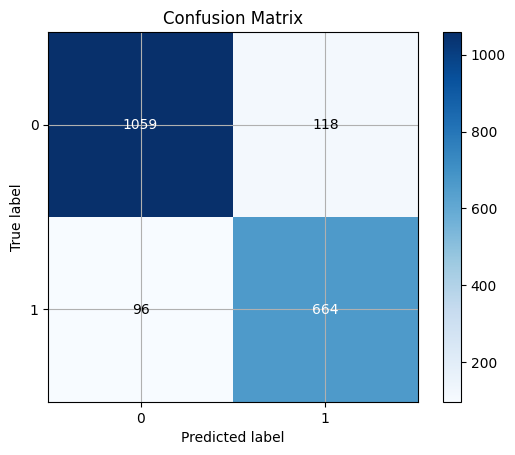

In [22]:
score = accuracy_score(label_test, predict)
print("Accuracy Score: %.2f%%" % (score*100))
print("\nClassification Report")
print(classification_report(label_test, predict))
print("\nConfusion Matrix")
plot_cmat(label_test, predict)